In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('C:/Users/20254817/Desktop/Githib/Dependence-modeling-/data/temperature_vs_altitude.csv' , sep = ";" , header = None)
print(df.head()) 

       0    1
0  205.0  9.7
1   46.0  8.2
2  794.0  6.4
3  325.0  8.1
4  500.0  6.2


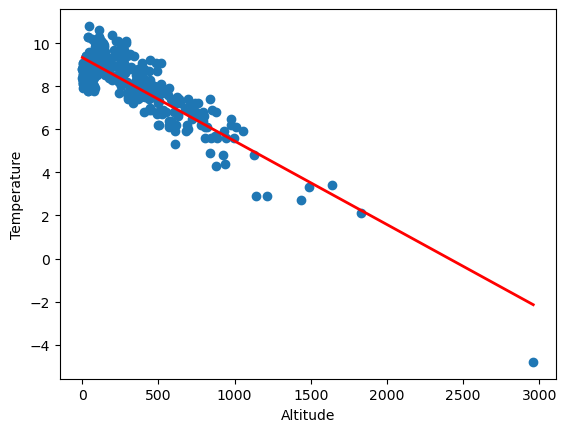

In [12]:
X = np.array(df.iloc[: , 0])
Y = np.array(df.iloc[: , 1])

causal_model = LinearRegression()
causal_model.fit(X.reshape(-1 , 1) , Y )
####Visualize Altitue vs Temperature 

plt.scatter(X, Y)

# Add labels
plt.xlabel("Altitude")
plt.ylabel("Temperature")

a = causal_model.coef_
b = causal_model.intercept_

x_line = np.linspace(min(X), max(X), 100)
y_line = a * x_line + b

# Plot the line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'y = {a}x + {b}')


Text(0, 0.5, 'Residual of regre. temperature on altitude')

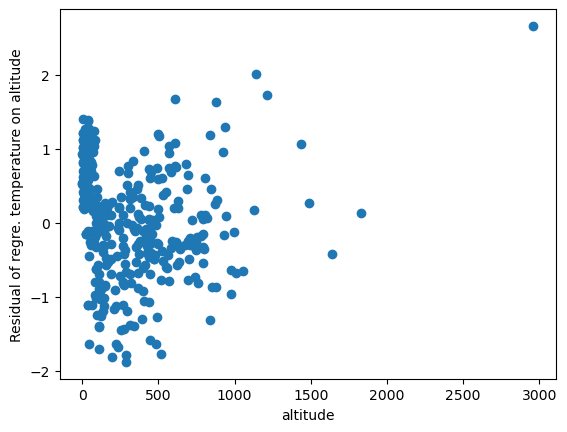

In [13]:
##### The true underlying model is Altitude(X) -> Temperature(Y) 
causal_model = LinearRegression()
causal_model.fit(X.reshape(-1 , 1) , Y )
Y_hat = causal_model.predict(X.reshape(-1 , 1))
residual_causal = Y_hat - Y 

plt.scatter(X, residual_causal)

# Add labels
plt.xlabel("altitude")
plt.ylabel("Residual of regre. temperature on altitude")

Text(0, 0.5, 'Residual of regre. altitude on temperature')

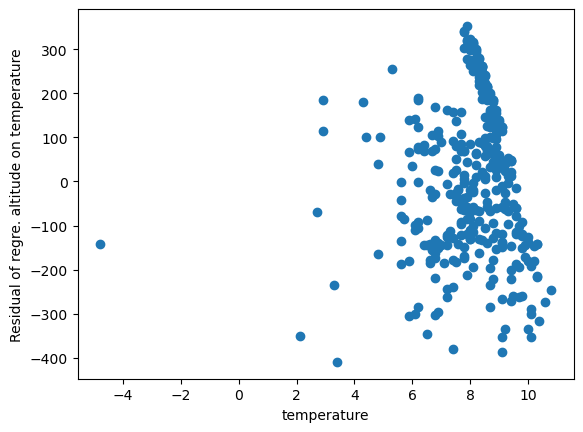

In [14]:
#### The anticausal model Y -> X 
anticausal_model = LinearRegression()
anticausal_model.fit(Y.reshape(-1 , 1) , X )
X_hat = anticausal_model.predict(Y.reshape(-1 , 1))

residual_anticausal = X_hat - X 

plt.scatter(Y, residual_anticausal)

# Add labels
plt.xlabel("temperature")
plt.ylabel("Residual of regre. altitude on temperature")